In [1]:
import numpy as np
from sklearn import datasets, decomposition #数据集和降维
from sklearn.decomposition import PCA #主成分分析
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.svm import SVC#支持向量机
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #绘制 3d 图
%matplotlib inline

In [2]:
np.random.seed(0)#设置随机数种子，保持每次生成的多元正态数据一致
mu_vec1 = np.array([0, 0, 0])#第一类均值向量
cov1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])#第一类协方差
class1_sample = np.random.multivariate_normal(mu_vec1, cov1, 20).T#建立 20 个第一类多元正态数据
mu_vec2 = np.array([1, 1, 1])#第二类均值向量
cov2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])#第二类协方差
class2_sample = np.random.multivariate_normal(mu_vec2, cov2, 20).T#建立 20 个第二类多元正态数据
print('查看两类数据的 shape：',class1_sample.shape,class2_sample.shape)
#其中 3 表示 3 个特征，20 表示 20 个样本

查看两类数据的 shape： (3, 20) (3, 20)


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  from ipykernel import kernelapp as app


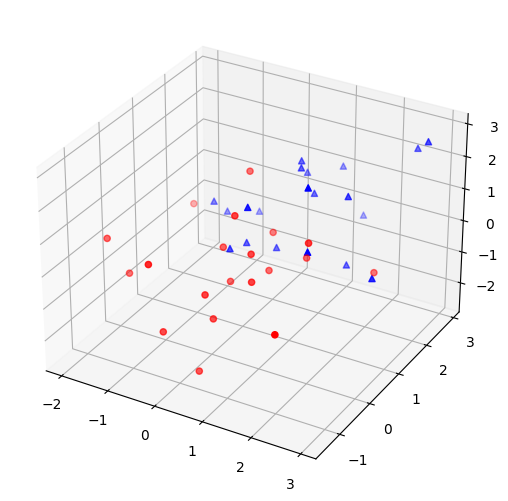

In [3]:
fig = plt.figure()#使用默认参数创建自定义图像
ax = Axes3D(fig)
ax.scatter(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], c='r', marker='o')#绘制第一类三维散点图
ax.scatter(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], c='b', marker='^')#绘制第二类三维散点图

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)#左右拼接成 3×40
print(all_samples.shape)#查看数据的形状
mean_x = np.mean(all_samples[0,:])#计算第一个特征的均值
mean_y = np.mean(all_samples[1,:])#计算第二个特征的均值
mean_z = np.mean(all_samples[2,:])#计算第三个特征的均值
#查看均值
print(mean_x)
print(mean_y)
print(mean_z)

(3, 40)
0.698873677249692
0.8001988430597677
0.39876271802731134


In [5]:
mean_vector = np.array([mean_x, mean_y, mean_z]).reshape(3, 1)#转换成 3×1 的格式
scatter_mat = np.zeros((3, 3))#存储散度矩阵
for i in range(all_samples.shape[1]):#遍历所有样本
    scatter_mat += (all_samples[:,i].reshape(3, 1)-mean_vector).dot((all_samples[:,i].reshape(3, 1)-mean_vector).T)#按公式计算每次的散度矩阵
print(scatter_mat)#查看散度矩阵 S

[[54.75319714 12.1506419  20.98922466]
 [12.1506419  53.09745345 18.13107282]
 [20.98922466 18.13107282 56.45952312]]


In [6]:
eig_val,eig_vec = np.linalg.eig(scatter_mat)#np.linalg.eig()中是散步矩阵或者协方差矩阵
#让我们来看看计算出的 3 个维度的特征值（eig_val）和特征向量（eig_vec）
print('查看特征值：',eig_val)
print('查看特征向量：',eig_vec)

查看特征值： [89.42331352 41.81509448 33.07176571]
查看特征向量： [[-0.5690384  -0.62675178 -0.53233213]
 [-0.51164745  0.77664688 -0.36747315]
 [-0.64374854 -0.06326004  0.76261785]]


In [7]:
W = eig_vec[:,0:2]#由于特征值刚好从大到小，因此相对应的选择前 2 个特征向量
y = (W.T).dot(all_samples)#特征向量×样本数据，得到降维后的数据
print('查看降维后的数据维度：',y.shape)

查看降维后的数据维度： (2, 40)


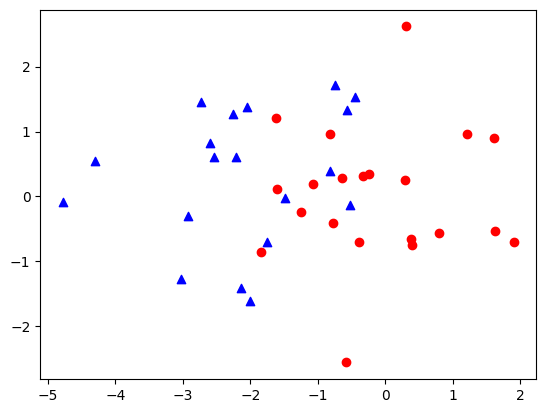

In [8]:
fig1 = plt.figure()#使用默认参数创建自定义图像
ax1 = fig1.add_subplot(111)
ax1.scatter(y[0,0:21], y[1,0:21], c='r', marker='o')#绘制降维后第一类三维散点图
ax1.scatter(y[0,21:], y[1,21:], c='b', marker='^')#绘制降维后第二类三维散点图
plt.show()

In [9]:
U,Sigma,VT=np.linalg.svd(all_samples.T)#对 40×3 的数据进行奇异值分解
print('左奇异矩阵：',U)
print("奇异值：",Sigma)
print("右奇异矩阵的转置：",VT)

左奇异矩阵： [[-0.15351166  0.14819938  0.03855707 ... -0.29529983 -0.07174715
  -0.09136703]
 [-0.16976084 -0.0594961   0.38713269 ...  0.13489604 -0.11421936
  -0.0928144 ]
 [-0.03584921  0.09865137  0.09840017 ...  0.26626721  0.24025417
   0.22555346]
 ...
 [-0.23121173  0.26727539 -0.21995382 ...  0.84412802 -0.07383545
  -0.076182  ]
 [-0.21715569 -0.07214212 -0.15577226 ... -0.05542339  0.92463164
  -0.06990326]
 [-0.21188455 -0.04072646 -0.14647068 ... -0.06075133 -0.07098979
   0.93345767]]
奇异值： [11.73075165  6.52111367  5.97368297]
右奇异矩阵的转置： [[-0.5966987  -0.61812718 -0.51173182]
 [ 0.58172901 -0.77246066  0.2547467 ]
 [ 0.55275856  0.14568221 -0.82050878]]


In [10]:
#取降维后的特征为 2 
X_svd=np.dot(all_samples.T,VT.T[:,:2])#使用 40×3 的数据，乘 3×2 的右奇异矩阵得到降维后的数据
print('查看降维后数据的 shape：',X_svd.shape)

查看降维后数据的 shape： (40, 2)


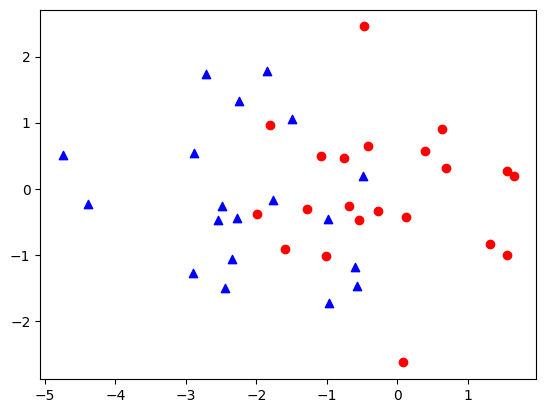

In [11]:
fig2 = plt.figure()#使用默认参数创建自定义图像
ax2 = fig2.add_subplot(111)
ax2.scatter(X_svd.T[0,0:21], X_svd.T[1,0:21], c='r', marker='o')#绘制降维后第一类三维散点图
ax2.scatter(X_svd.T[0,21:], X_svd.T[1,21:], c='b', marker='^')#绘制降维后第二类三维散点图
plt.show()

In [12]:
iris = datasets.load_iris()#鸢尾花数据集
X = iris.data#特征变量
y = iris.target#标签（因变量）
print('查看数据特征的大小：',X.shape)
print('查看标签的种类：',np.unique(y))

查看数据特征的大小： (150, 4)
查看标签的种类： [0 1 2]


In [13]:
pca = decomposition.PCA(n_components=None)#实例化，降维后主成分数为原特征数
pca#查看 PCA 的参数

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.fit(X)#使用鸢尾花特征数据训练模型
print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))#查看主成分分析后的主成分方差比例

explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


In [15]:
pca = decomposition.PCA(n_components=2)#实例化，降维成 2 维
pca.fit(X)#鸢尾花特征数据训练模型
X_r = pca.transform(X)#对鸢尾花特征数据降维
print('查看原特征数据的 shape：',X.shape)
print('查看降维成 2 维的特征数据的 shape：',X_r.shape)

查看原特征数据的 shape： (150, 4)
查看降维成 2 维的特征数据的 shape： (150, 2)


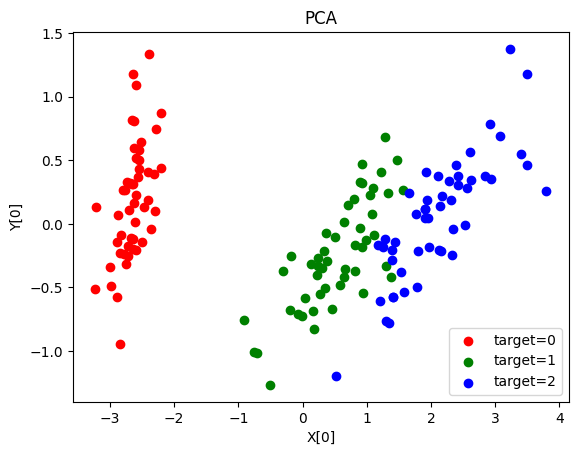

In [17]:
fig3 = plt.figure()#使用默认参数创建自定义图像
ax3 = fig3.add_subplot(111)
colors = ['r','g','b'] #3 类样本的颜色
for label, color in zip(np.unique(y),colors):#每种标签对应一个颜色
 position = y==label#标签为（0,1,2）的一种时，如标签为 1（y==1），此时 y 的其他标签（0,2）都为 False,只有 y==1 的位置为 True，这样就能返回所需要的的样本位置。
 ax3.scatter(X_r[position,0],X_r[position,1],label='target=%d' % label,color=color)#绘散点图，取前面返回的 position 样本数据，并给对应的标签 label 和对应的颜色
ax3.set_xlabel('X[0]')#X 轴为 X[0]
ax3.set_ylabel('Y[0]')#Y 轴为 Y[0]
ax3.legend(loc='best')#设置图例的位置
ax3.set_title('PCA') #设置标签
plt.show()

In [18]:
digits = datasets.load_digits() #导入手写数据集
data_x=digits.data #特征数据
data_y=digits.target #标签数据
print('特征数据的形状：',data_x.shape)
print('标签数据的种类：',np.unique(data_y))

特征数据的形状： (1797, 64)
标签数据的种类： [0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_nopca_train,X_nopca_test,y_nopca_train,y_nopca_test = 
train_test_split(data_x,data_y,test_size=0.3,random_state=4)#保持划分数据集一致
svc = SVC(kernel = 'rbf')#使用高斯核函数参数对支持向量机实例化
svc.fit(X_nopca_train,y_nopca_train)#使用未降维的训练集进行模型训练
score_nopca=svc.score(X_nopca_test,y_nopca_test)#计算在测试集上的得分
print('未降维 svc 得分：',score_nopca)
print('此时数据的大小：',data_x.shape)

In [ ]:
pca = PCA(n_components=0.8)#n_components 参数设置需要保留特征的数量，如果是小数，则
表示保留特征的比例，这里保持原数据集 80%的信息
data_x_pca=pca.fit_transform(data_x)#训练模型并对数据降维处理得到新数据集
X_pca_train,X_pca_test,y_pca_train,y_pca_test = 
train_test_split(data_x_pca,data_y,test_size=0.3,random_state=4)#保持划分数据集一致
svc = SVC(kernel = 'rbf')#使用高斯核函数参数对支持向量机实例化
svc.fit(X_pca_train,y_pca_train)#使用未降维的训练集进行模型训练
score_pca=svc.score(X_pca_test,y_pca_test)#计算在测试集上的得分
print('pca 降维 svc 得分：',score_pca)
print('查看此时数据集的大小：',data_x_pca.shape)